In [120]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [121]:
df_tf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df_tf

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [122]:
df_tf.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [123]:
df_tf.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [124]:
df_tf.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [125]:
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


all the columns are in float except the date and later that column need to changed to Date dtype

In [126]:
df_tf.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see null values in the dataset but we can handle as they are not in maximum numbers which can effect the dataset

In [127]:
df_tf.nunique().to_frame("No. of Unique values")

,No. of Unique values
station,25
Date,310
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675


In [128]:
for column in df_tf.columns:
    unique_count = df_tf[column].nunique()
    unique_values = df_tf[column].unique()
    
    print(f"Column: {column}")
    print(f"Number of Unique Values: {unique_count}")
    print(f"Unique Values: {unique_values}\n")

Column: station
Number of Unique Values: 25
Unique Values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. nan]

Column: Date
Number of Unique Values: 310
Unique Values: ['30-06-2013' '01-07-2013' '02-07-2013' '03-07-2013' '04-07-2013'
 '05-07-2013' '06-07-2013' '07-07-2013' '08-07-2013' '09-07-2013'
 '10-07-2013' '11-07-2013' '12-07-2013' '13-07-2013' '14-07-2013'
 '15-07-2013' '16-07-2013' '17-07-2013' '18-07-2013' '19-07-2013'
 '20-07-2013' '21-07-2013' '22-07-2013' '23-07-2013' '24-07-2013'
 '25-07-2013' '26-07-2013' '27-07-2013' '28-07-2013' '29-07-2013'
 '30-07-2013' '31-07-2013' '01-08-2013' '02-08-2013' '03-08-2013'
 '04-08-2013' '05-08-2013' '06-08-2013' '07-08-2013' '08-08-2013'
 '09-08-2013' '10-08-2013' '11-08-2013' '12-08-2013' '13-08-2013'
 '14-08-2013' '15-08-2013' '16-08-2013' '17-08-2013' '18-08-2013'
 '19-08-2013' '20-08-2013' '21-08-2013' '22-08-2013' '23-08-2013'
 '24-08-2013' '25-08-2013' '26-08-2013' '27-08-201

In [130]:
#NOw convertt the date from object to datetime function
df_tf['Date']=pd.to_datetime(df_tf['Date'])

print(df_tf['Date'].dtype)

datetime64[ns]


In [131]:
df_f=df_tf

In [135]:
#replacing the missing the values  in columns with mean 
num_col=['station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
        'Next_Tmax', 'Next_Tmin']

for col in num_col:
    df_f[col].fillna(df_f[col].mean(),inplace=True)
    
    

In [136]:
num2_col=['Date']

for col in num2_col:
    df_f[col].fillna(df_f[col].median(),inplace=True)

I used median here as its date so mean will be not suitable it  

In [137]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

here the rows are 7752 and columns 25 

In [138]:
df_f.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [139]:
df_f.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,2015-07-30 21:35:51.083591168,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,2015-07-30 12:00:00,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,2016-08-15 00:00:00,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000
std,7.210637,NaN,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276


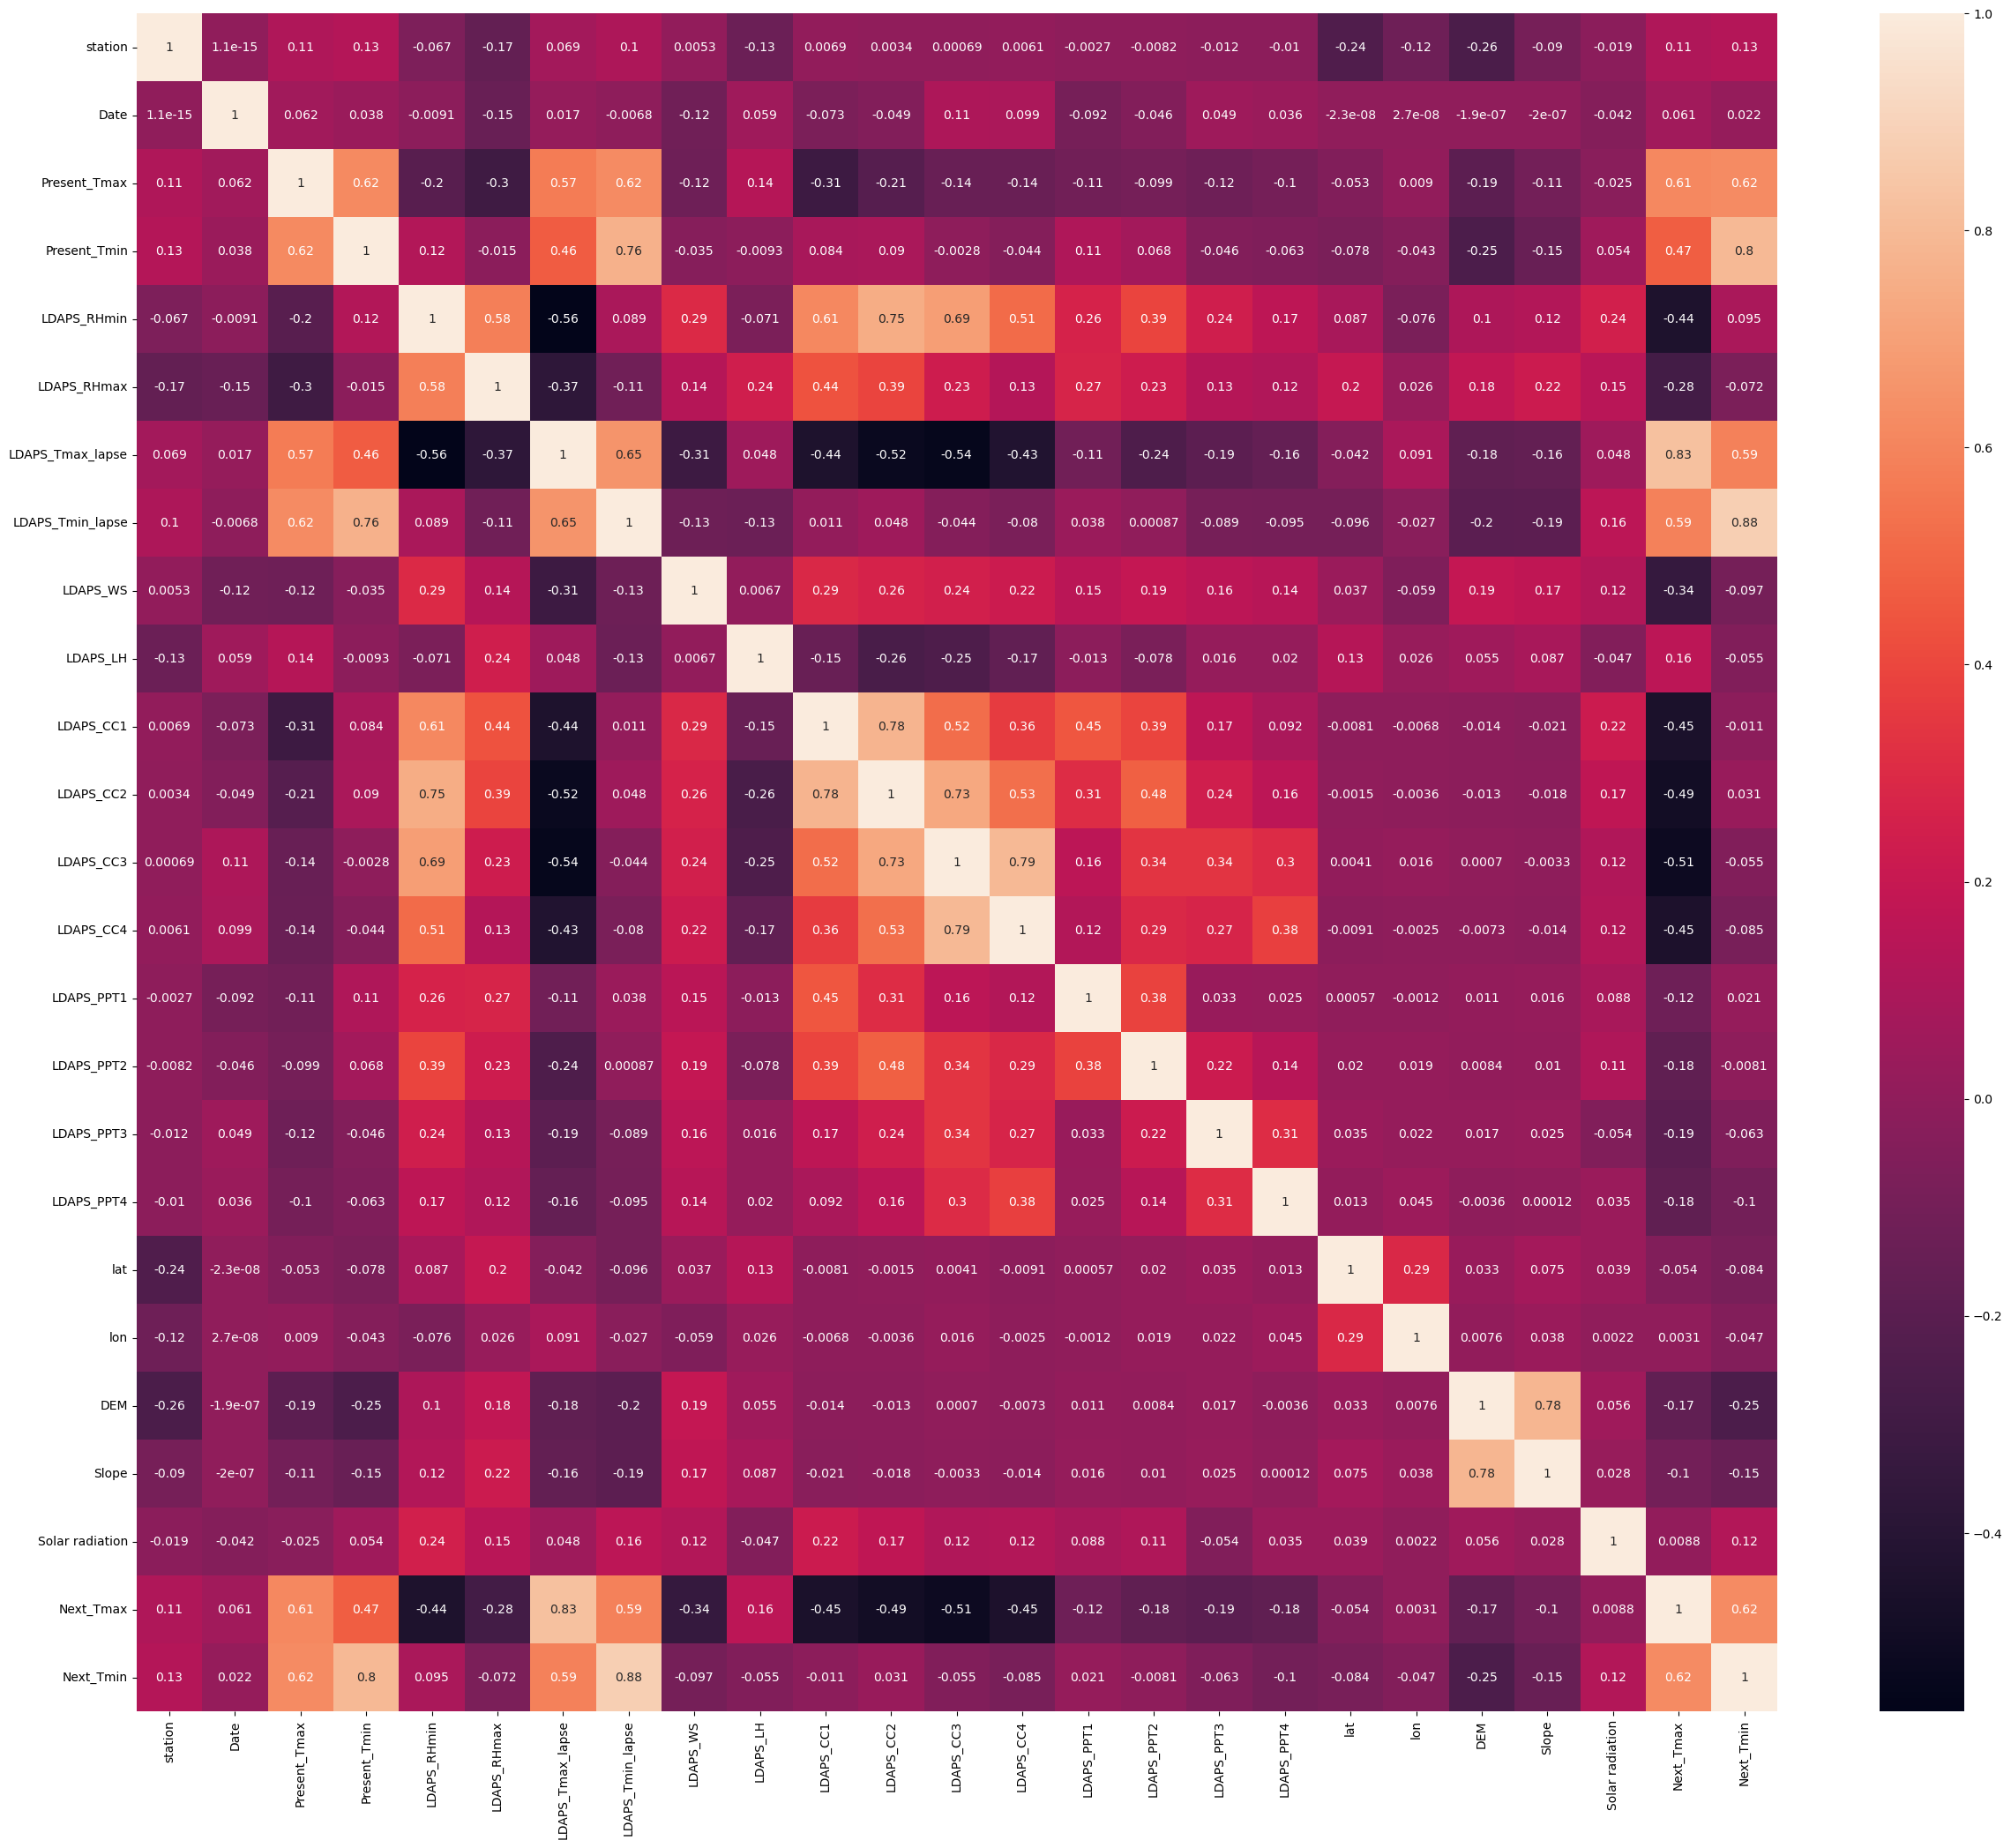

In [140]:
plt.figure(figsize=(30,25))
sns.heatmap(df_f.corr(),annot=True)
plt.show()

some values are correlated and lat ,long are not so much correlated so drop the columns

In [141]:
df_f=df_f.drop(columns=['lat','lon'],axis=1)
df_f.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5


In [142]:
df_f.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,2015-07-30 21:35:51.083591168,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.299191,0.591995,0.485003,0.278200,0.269407,61.867972,1.257048,5341.502803,30.274887,22.932220
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.082741,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,2015-07-30 12:00:00,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.232354,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,2016-08-15 00:00:00,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.497230,0.067593,0.024276,0.009697,0.000693,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230,5992.895996,38.900000,29.800000
std,7.210637,NaN,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,0.253114,1.936331,1.754258,1.156174,1.200364,54.279780,1.370444,429.158867,3.122557,2.483276


LDAPS_RHmin,LDAPS_WS,LDAPS_LH or others have outliers as 75 percentile and max value have maximum distance

Our target variable are Next_Tmax and Next_Tmin 

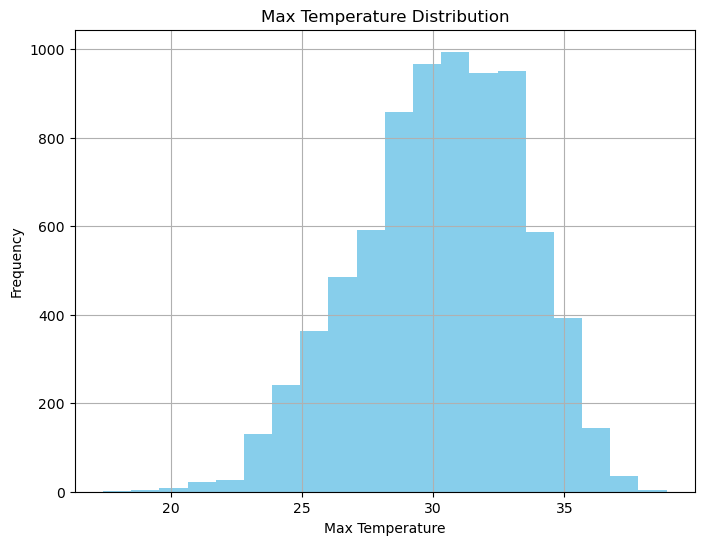

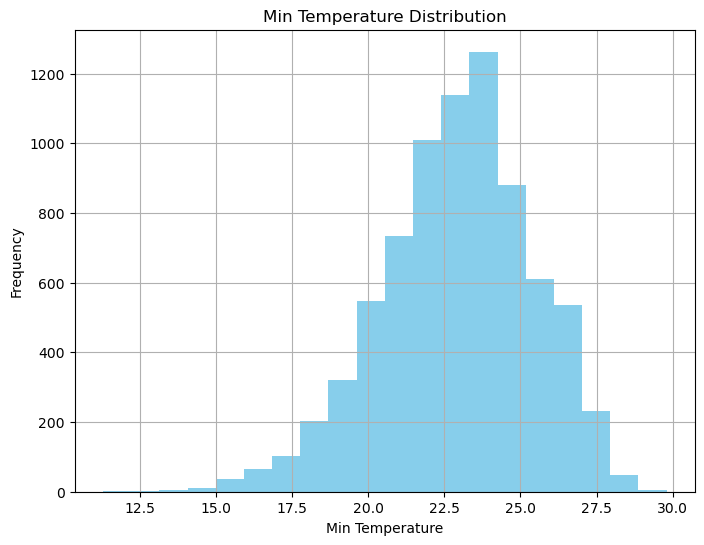

In [143]:
#creating the subplots

plt.figure(figsize=(8,6))
plt.hist(df_f['Next_Tmax'],bins=20,color='skyblue')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Max Temperature Distribution')
plt.grid(True)

#Min Temperature
plt.figure(figsize=(8,6))
plt.hist(df_f['Next_Tmin'],bins=20,color='skyblue')
plt.xlabel('Min Temperature')
plt.ylabel('Frequency')
plt.title('Min Temperature Distribution')
plt.grid(True)

plt.tight_layout
plt.show()



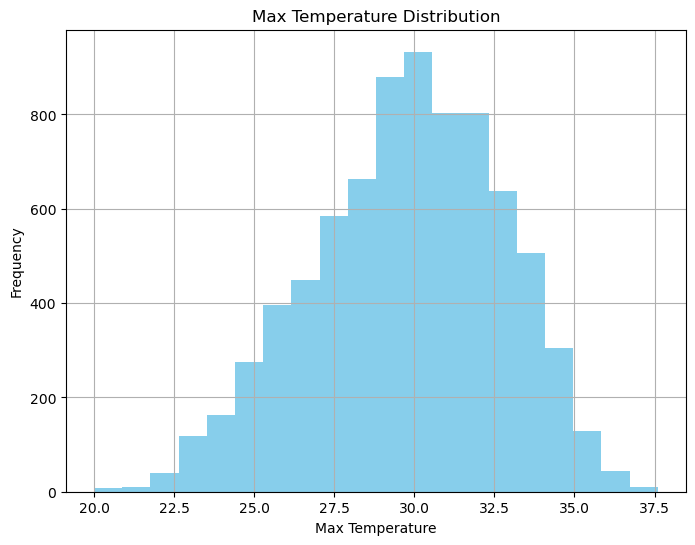

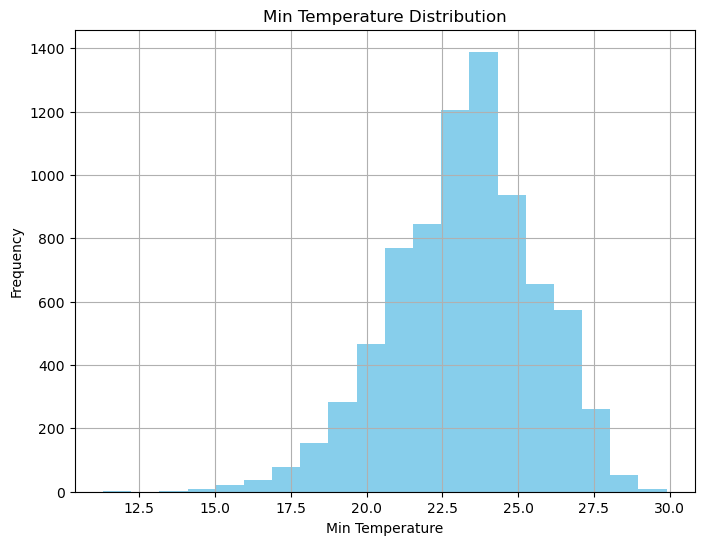

In [144]:
#creating the subplots

plt.figure(figsize=(8,6))
plt.hist(df_f['Present_Tmax'],bins=20,color='skyblue')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Max Temperature Distribution')
plt.grid(True)

#Min Temperature
plt.figure(figsize=(8,6))
plt.hist(df_f['Present_Tmin'],bins=20,color='skyblue')
plt.xlabel('Min Temperature')
plt.ylabel('Frequency')
plt.title('Min Temperature Distribution')
plt.grid(True)

plt.tight_layout
plt.show()


Text(0, 0.5, 'Min temperature present')

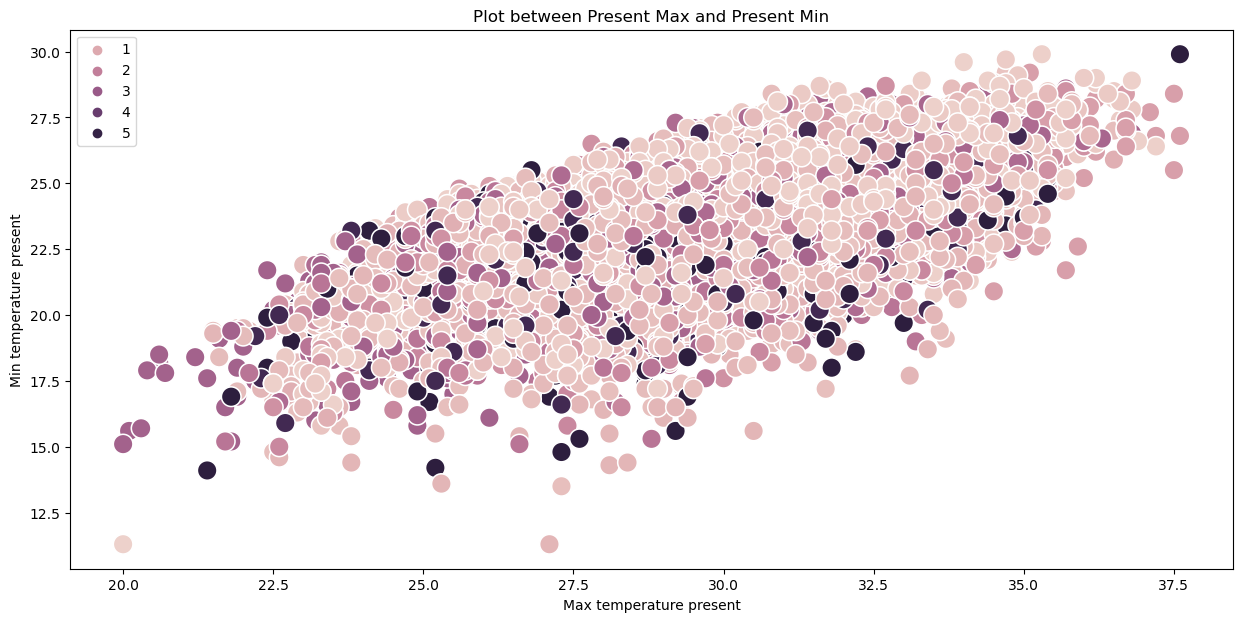

In [145]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Present Max and Present Min')
sns.scatterplot(x=df_f['Present_Tmax'], y=df_f['Present_Tmin'], hue=df_f['Slope'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Max temperature present')
plt.ylabel("Min temperature present")

Slope of 1 is maximum in the present day temperatur and graph seems upward in straight line

Scatter plot of next max and next min

Text(0, 0.5, 'Min temperature next')

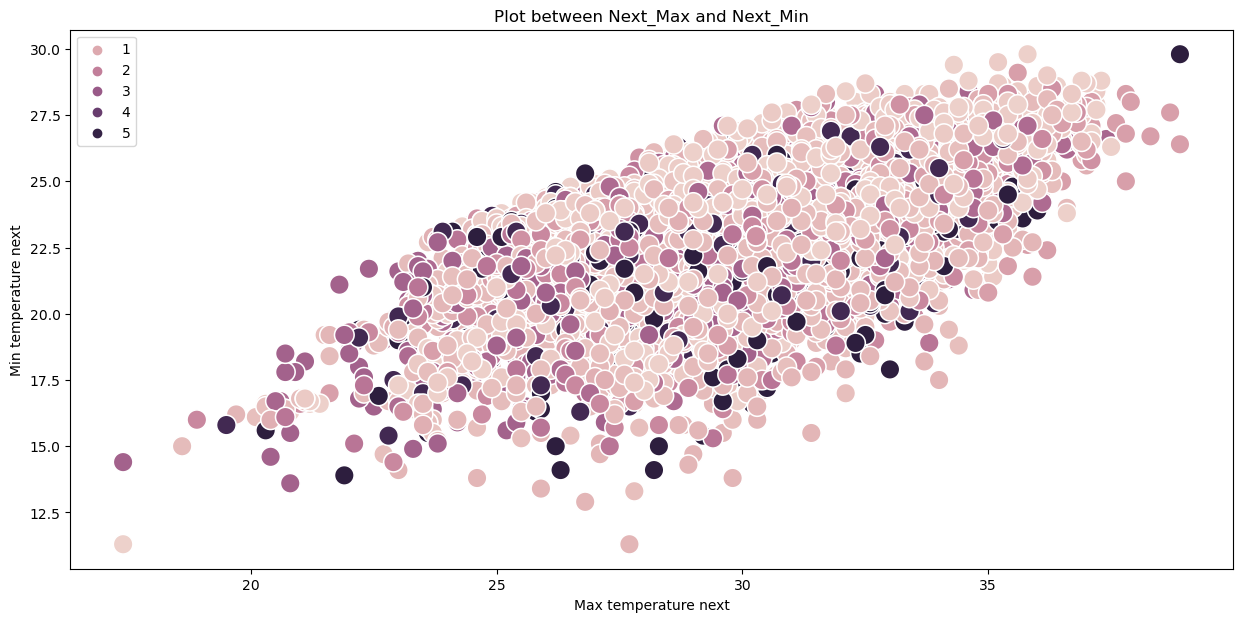

In [146]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Next_Max and Next_Min')
sns.scatterplot(x=df_f['Next_Tmax'], y=df_f['Next_Tmin'], hue=df_f['Slope'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Max temperature next')
plt.ylabel("Min temperature next")

Slope of 1 is maximum in the present day temperatur and graph seems upward in straight line which shows that slope is 1 in higher temperatures


Text(0, 0.5, 'Min temperature present')

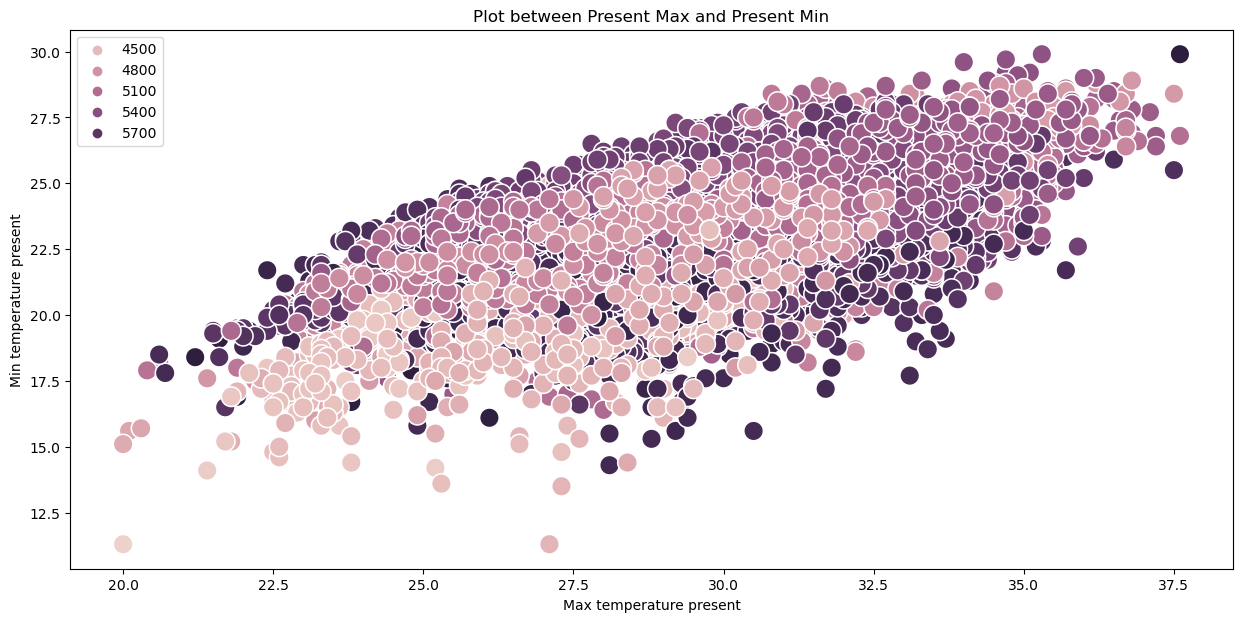

In [147]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Present Max and Present Min')
sns.scatterplot(x=df_f['Present_Tmax'], y=df_f['Present_Tmin'], hue=df_f['Solar radiation'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Max temperature present')
plt.ylabel("Min temperature present")

the solar radiation is higher in maximum temperatures as observed

<Figure size 1400x700 with 0 Axes>

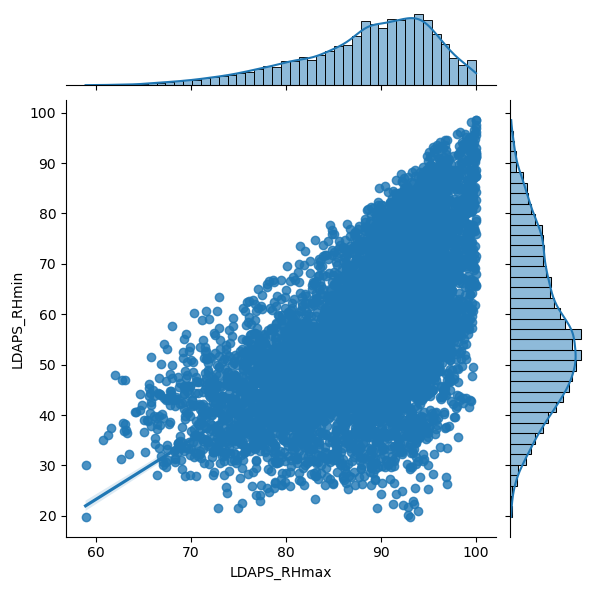

In [148]:
plt.figure(figsize=(14,7))
sns.jointplot(data=df_f,x='LDAPS_RHmax',y='LDAPS_RHmin',kind='reg')
plt.show()

as we can observe that point are near to each other and incresing near to straith line seems dataset is balanced

<Figure size 1400x700 with 0 Axes>

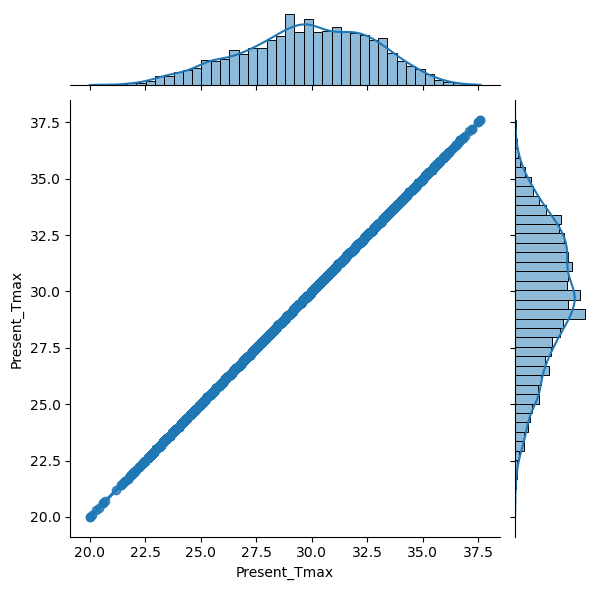

In [149]:
plt.figure(figsize=(14,7))
sns.jointplot(data=df_f,x='Present_Tmax',y='Present_Tmax',kind='reg')
plt.show()

In [150]:
#checking for the skweness

num =df_f.select_dtypes(include=['float64', 'int64'])
skewness =num.skew()  
print(skewness)

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64


Variables like 'LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', and 'LDAPS_PPT4' have higher positive skewness values, indicating that their distributions are right-skewed with long tails on the right side

In [154]:
# removing the skewness

no_skew =['LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope']

# Apply cube root transformation to each column
for i in no_skew:
    df_f[i] = np.cbrt(df_f[i])

# Checking the skewness of the transformed columns
sk= df_f[no_skew].skew()

sk


LDAPS_RHmax   -1.054920
LDAPS_WS       0.677959
LDAPS_LH      -6.599960
LDAPS_PPT1     0.832326
LDAPS_PPT2     1.017976
LDAPS_PPT3     1.100884
LDAPS_PPT4     1.413383
DEM            0.584482
Slope          0.250789
dtype: float64

We have maximumly reduced the skewness of the dataset 

checking for the outliesrs in the dataset 

IndexError: index 9 is out of bounds for axis 0 with size 9

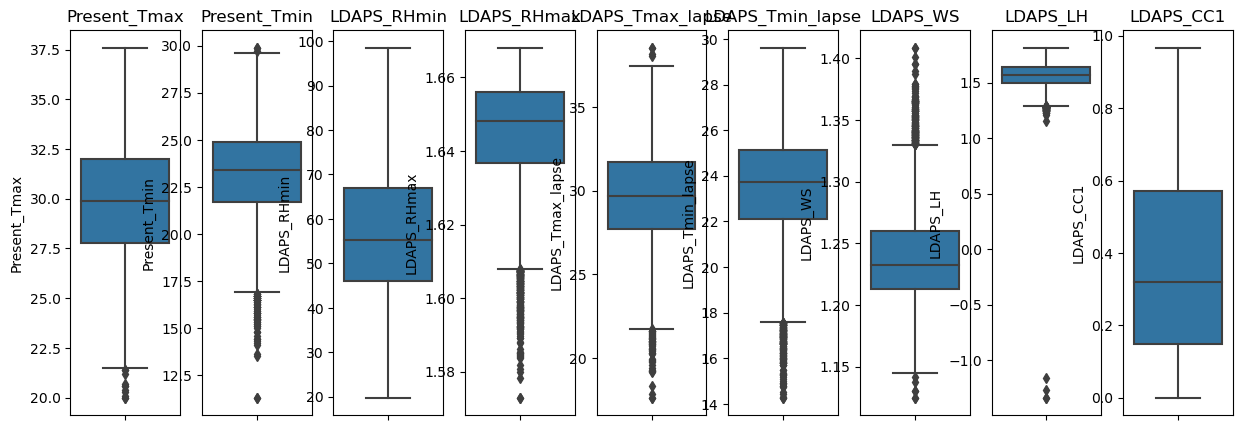

In [155]:
# Select the columns you want to create boxplots for
col=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM',
'Slope', 'Solar radiation','Next_Tmax', 'Next_Tmin']

# Creating subplots for the selected columns
fig, axes = plt.subplots(1, len(column), figsize=(15, 5))

# Creating boxplots for each selected column
for i, column in enumerate(col):
    sns.boxplot(data=df_f, y=column, ax=axes[i])
    axes[i].set_title(f'{column}')
plt.tight_layout()

plt.show()

As we can observe outliers in many columns and we must remove the oultiers

In [156]:
from scipy import stats
# Calculate the Z-Scores for each numerical attribute
z_scores=np.abs(stats.zscore(df_f.drop('Date', axis=1)))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
df_f1=df_f[~outliers]
df_f1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,1.650946,28.074101,23.006936,1.237755,1.601886,...,0.130928,0.0,0.0,0.0,0.0,1.813669,1.120534,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,1.649914,29.850689,24.035009,1.213158,1.550990,...,0.127727,0.0,0.0,0.0,0.0,1.525579,0.928740,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,1.636039,30.091292,24.565633,1.223377,1.399336,...,0.142125,0.0,0.0,0.0,0.0,1.476285,0.863209,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,1.661479,29.704629,23.326177,1.212164,1.592105,...,0.134249,0.0,0.0,0.0,0.0,1.529157,1.108875,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,1.649002,29.113934,23.486480,1.214176,1.682366,...,0.170021,0.0,0.0,0.0,0.0,1.484621,0.927001,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,1.623283,27.812697,18.303014,1.233344,1.285914,...,0.004380,0.0,0.0,0.0,0.0,1.438034,0.939837,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,1.635424,26.704905,17.814038,1.214952,1.632045,...,0.017678,0.0,0.0,0.0,0.0,1.409565,0.799324,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,1.624680,26.352081,18.775678,1.223614,1.608457,...,0.000000,0.0,0.0,0.0,0.0,1.356847,0.813132,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,1.621043,27.010193,18.733519,1.232085,1.534744,...,0.000000,0.0,0.0,0.0,0.0,1.372614,0.846131,4438.373535,28.6,18.8


In [157]:
# shape of new dataframe and old dataframe
print("Old Dataframe-",df_f.shape[0])
print("New Dateframe-",df_f1.shape[0])

Old Dataframe- 7752
New Dateframe- 7506


In [158]:
print(((df_f.shape[0]-df_f1.shape[0])/df_f.shape[0])*100)

3.1733746130030958


data loss is withhin the limits

In [161]:
# Splitting the dataset into train and test sets
X = df_f1.drop(['Date','Next_Tmax','Next_Tmin'], axis=1)
y = df_f1[['Next_Tmax','Next_Tmin']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
#RandomForestRegressor
rf =RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.6701822716205791
MSE: 0.8028720739854844
RMSE: 0.8960312907401641


In [163]:
# training the models

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 0.9752454113435315
MSE: 1.6676787192305733
RMSE: 1.291386355522844


In [172]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.974599888758161
MSE: 1.6691253172450127
RMSE: 1.291946329088408


 As compared to both the models the Random Forest Regressor outperforms Linear Regression and ridge based on all three metrics. It has lower MAE, MSE, and RMSE, which means that it is making predictions that are, on average, closer to the actual values.

In [178]:
# Make predictions on a test dataset
y_pred = rf.predict(X_test) 

# Now, y_pred contains the predicted values for both 'Next_Tmax' and 'Next_Tmin'
# For predicting the Next_Tmax and Next_Tmin
y_pred_Next_Tmax = y_pred[:, 0]  
y_pred_Next_Tmin = y_pred[:, 1]  

# Now, y_pred_Next_Tmax and y_pred_Next_Tmin contain the predicted values for 'Next_Tmax' and 'Next_Tmin' respectively


In [174]:
print("The Next Max temperature is:",y_pred_Next_Tmax)
print("The Next Min temperature is:",y_pred_Next_Tmin)

The Next Max temperature is: [29.685 36.076 28.693 ... 32.91  29.434 28.269]
The Next Min temperature is: [20.25  26.923 20.577 ... 25.264 22.533 19.054]


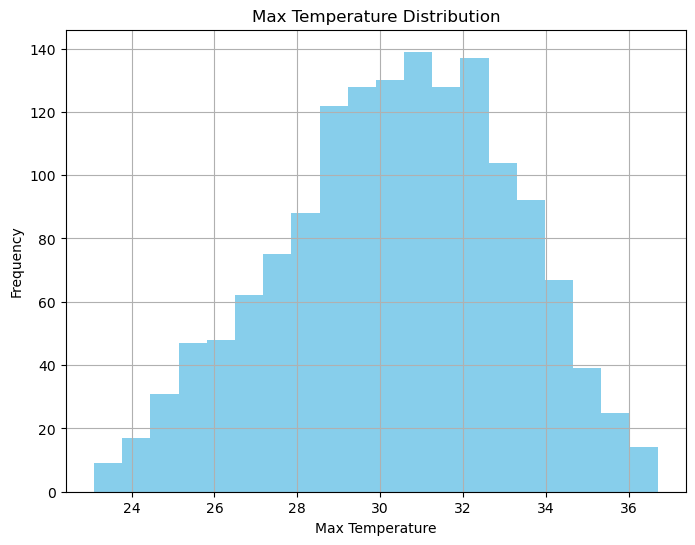

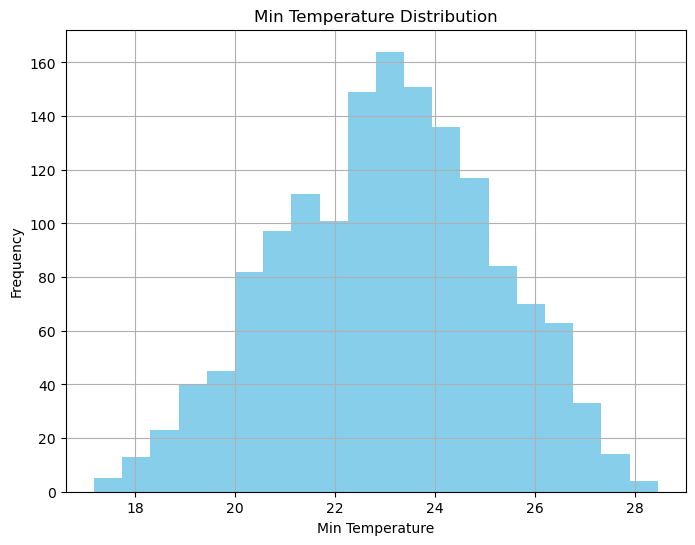

In [179]:
#creating the subplots

plt.figure(figsize=(8,6))
plt.hist(y_pred_Next_Tmax,bins=20,color='skyblue')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Max Temperature Distribution')
plt.grid(True)

#Min Temperature
plt.figure(figsize=(8,6))
plt.hist(y_pred_Next_Tmin,bins=20,color='skyblue')
plt.xlabel('Min Temperature')
plt.ylabel('Frequency')
plt.title('Min Temperature Distribution')
plt.grid(True)

plt.tight_layout
plt.show()